In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.ZigZag.Builder import ZigZagBuilder
import src.ZigZag.Builder as zzc

In [2]:
np.random.seed(1997)

In [3]:
X = np.cumprod(1 + np.random.randn(300) * 0.01)

In [4]:
x_sr = pd.Series(X)
x_sr

0      1.004446
1      1.004694
2      1.004531
3      1.006831
4      1.019180
         ...   
295    0.984610
296    1.003997
297    1.007873
298    1.015916
299    1.028091
Length: 300, dtype: float64

In [5]:
zzb = ZigZagBuilder(0.03, -0.03)

In [6]:
zzb_df = zzb.build_all(x_sr)
zzb_df

,Flag,Value,Angle,Nearest_Ext,Delta_Near_Ext
0,-1,1.004446,0.00724,1.098566,0.094119
1,0,1.011686,0.00724,1.098566,0.093872
2,0,1.018926,0.00724,1.098566,0.094035
3,0,1.026166,0.00724,1.098566,0.091735
4,0,1.033406,0.00724,1.098566,0.079385
...,...,...,...,...,...
295,0,0.995731,0.00809,1.028091,0.043481
296,0,1.003821,0.00809,1.028091,0.024094
297,0,1.011911,0.00809,1.028091,0.020218
298,0,1.020001,0.00809,1.028091,0.012175


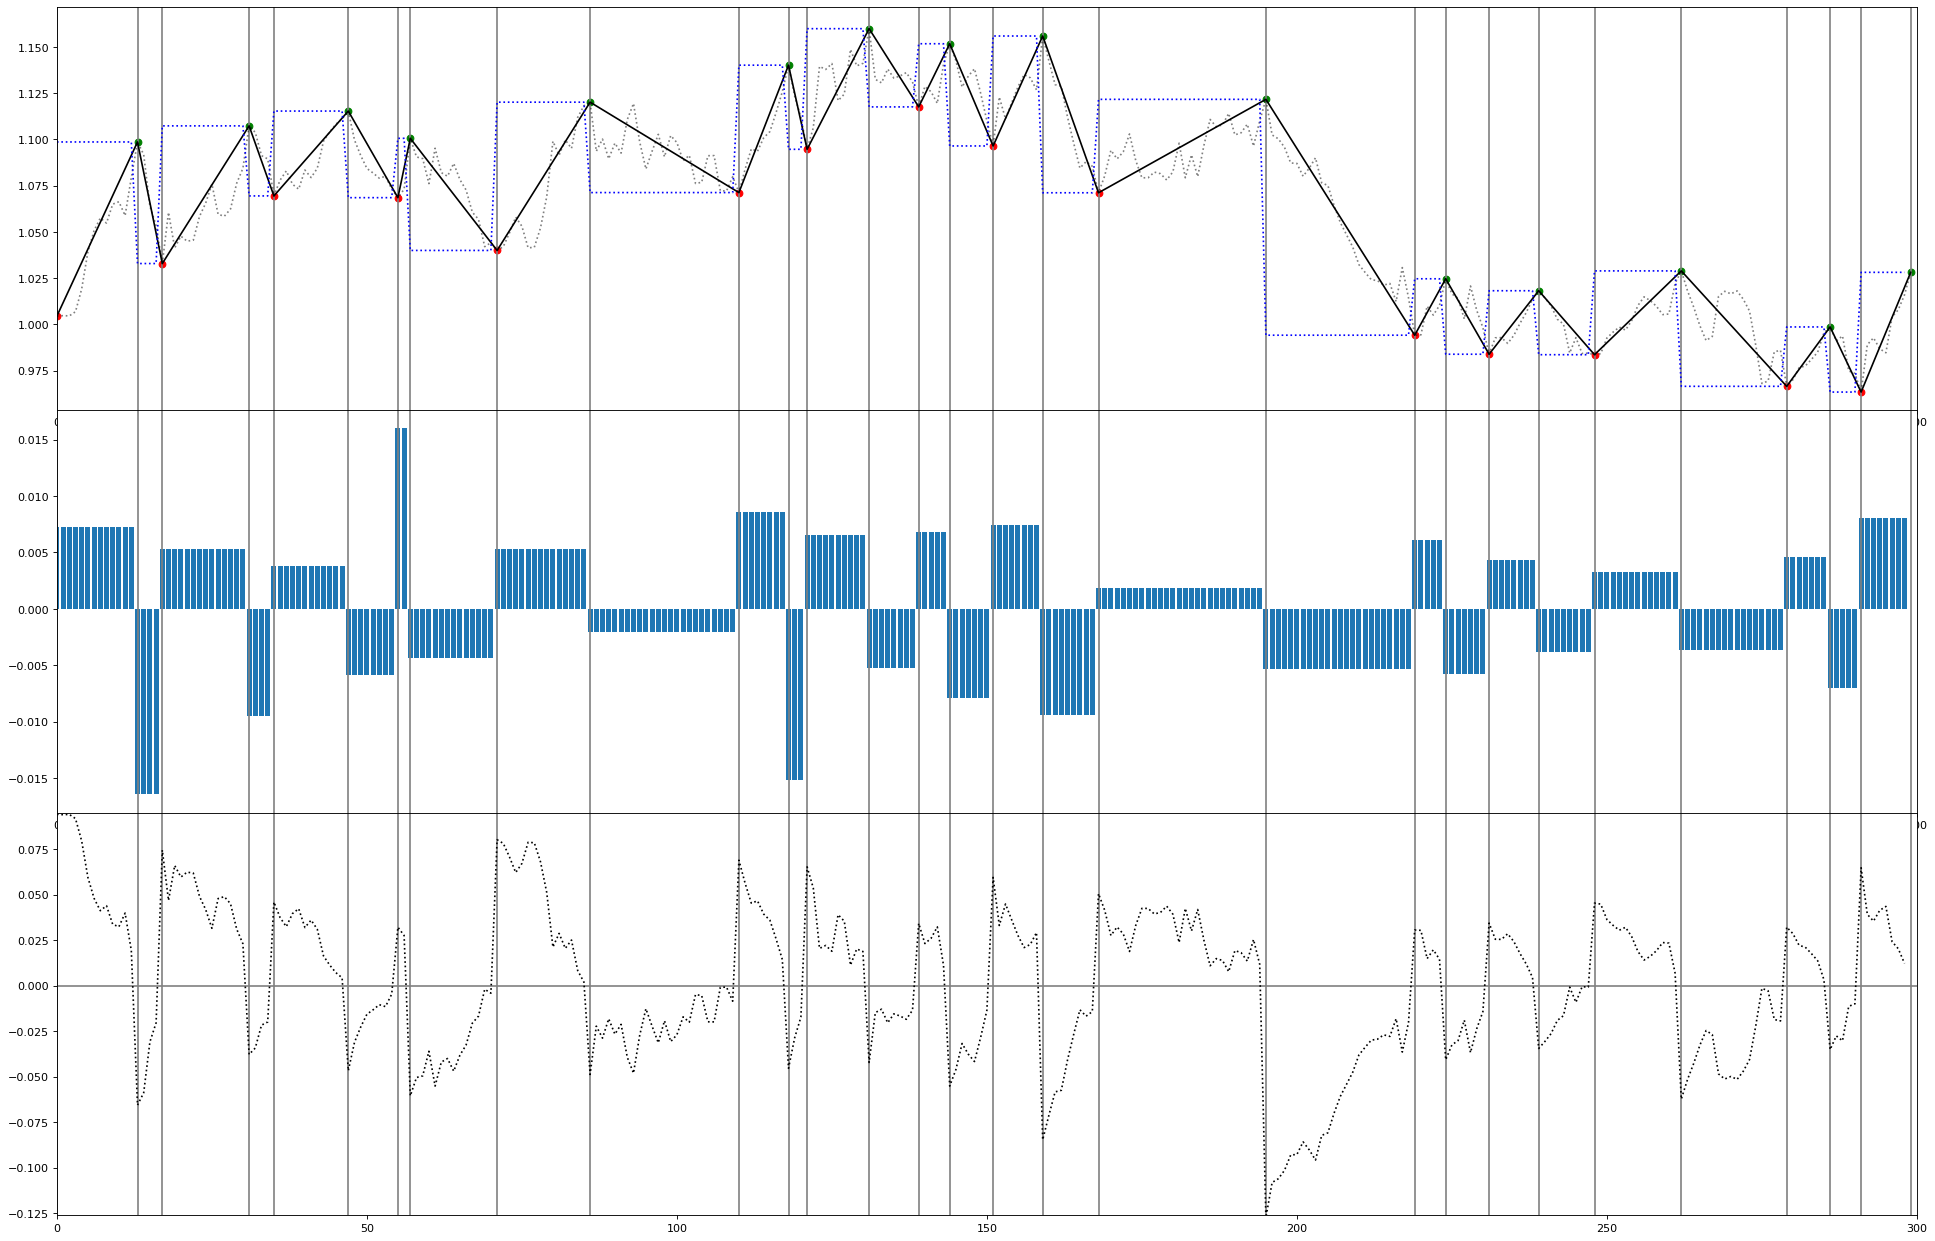

In [7]:
f, axs = plt.subplots(3,1,figsize=(30,20), dpi=80)
plt.subplots_adjust(hspace=0)

axs[0].set_xlim(0, len(X))
axs[0].set_ylim(X.min()*0.99, X.max()*1.01)
axs[0].plot(np.arange(len(X)), X, 'k:', alpha=0.5)
axs[0].plot(np.arange(len(X)), zzb_df[zzc.VALUE_COL_NAME], 'k-')
axs[0].scatter(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] == 1], zzb_df[zzc.VALUE_COL_NAME][zzb_df[zzc.FLAG_COL_NAME] == 1], color='g')
axs[0].scatter(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] == -1], zzb_df[zzc.VALUE_COL_NAME][zzb_df[zzc.FLAG_COL_NAME] == -1], color='r')
axs[0].plot(np.arange(len(X)), zzb_df[zzc.NEAREST_EXT], 'b:')

axs[1].set_xlim(0, len(X))
axs[1].set_ylim(zzb_df[zzc.ANGLE_COL_NAME].min()*1.10, zzb_df[zzc.ANGLE_COL_NAME].max()*1.10)
axs[1].bar(np.arange(len(X)), zzb_df[zzc.ANGLE_COL_NAME])

axs[2].set_xlim(0, len(X))
axs[2].set_ylim(zzb_df[zzc.DELTA_NEAR_EXT].min()*0.99, zzb_df[zzc.DELTA_NEAR_EXT].max()*1.01)
axs[2].plot(np.arange(len(X)), zzb_df[zzc.DELTA_NEAR_EXT], 'k:')
axs[2].hlines(0,xmin=0,xmax=len(X), colors='grey')

for i in range(len(axs)):   
    axs[i].vlines(np.arange(len(X))[zzb_df[zzc.FLAG_COL_NAME] != 0],*axs[i].get_ylim(),"grey")

In [8]:
from src.ZigZag.Vizualize import draw_chart

(<Figure size 2400x1600 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

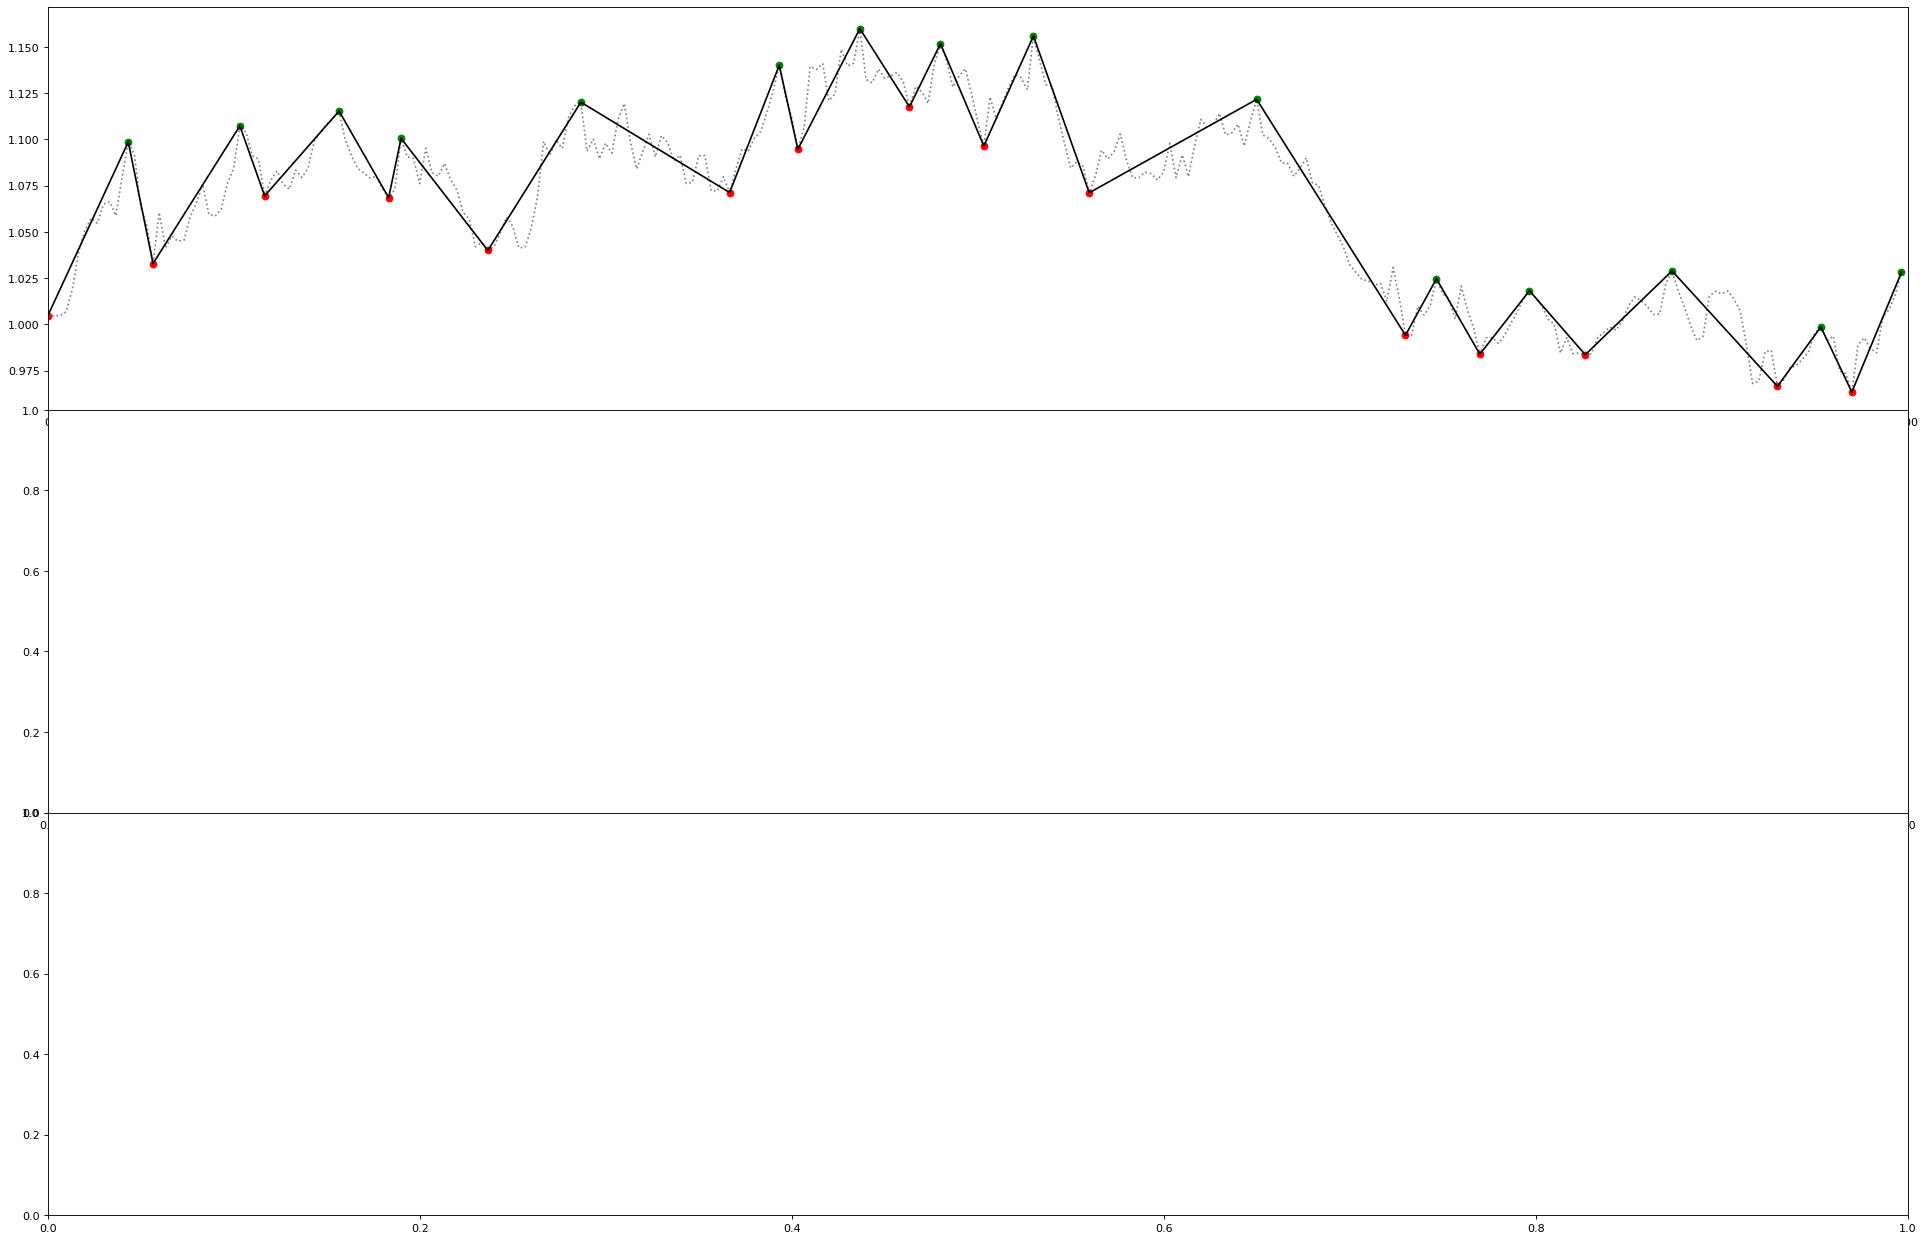

In [10]:
draw_chart(x_sr, zzb_df)